In [1]:
import numpy as np
import cv2
from skimage.io import imread
import pygast
import matplotlib.pyplot as plt
%matplotlib inline

255


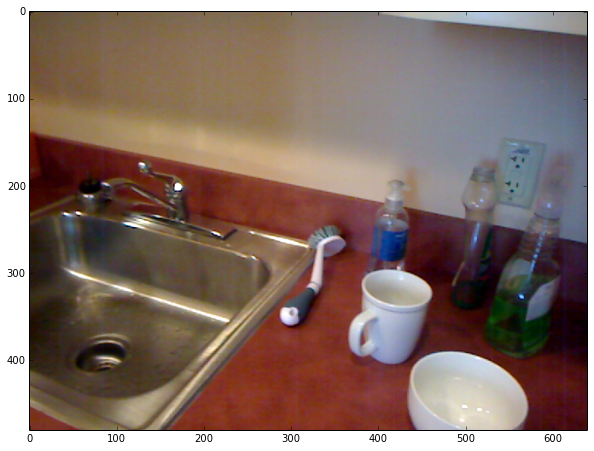

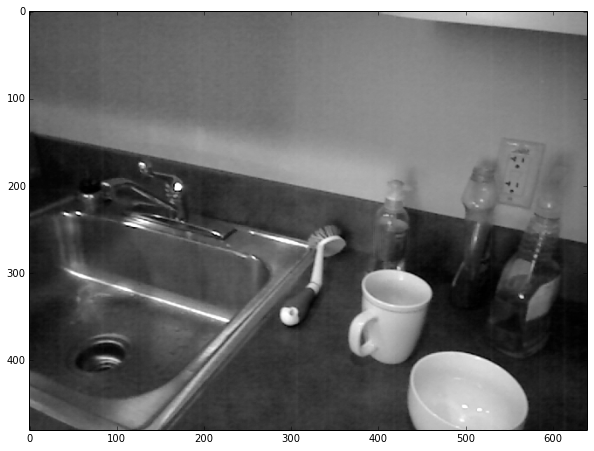

In [2]:
img = imread("/home/jlowens/Downloads/rgbd-scenes/kitchen_small/kitchen_small_1/kitchen_small_1_150.png")
plt.figure(figsize=(10,10))
plt.imshow(img)

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gimg, cmap="gray")
print np.amax(gimg)

In [3]:
sym = pygast.Symmetry()

In [18]:
smag = np.zeros(gimg.shape, dtype=np.float32)
sdir = np.zeros(gimg.shape, dtype=np.float32)
sym.transform(gimg, smag, sdir, 12)

(480, 640)
uint8
(480, 640)
float32
0.104032


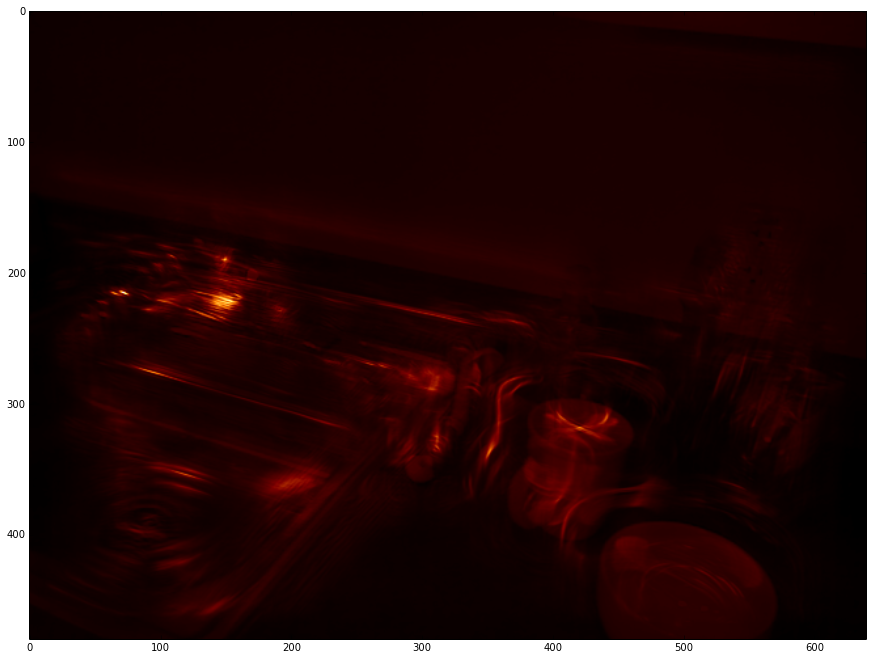

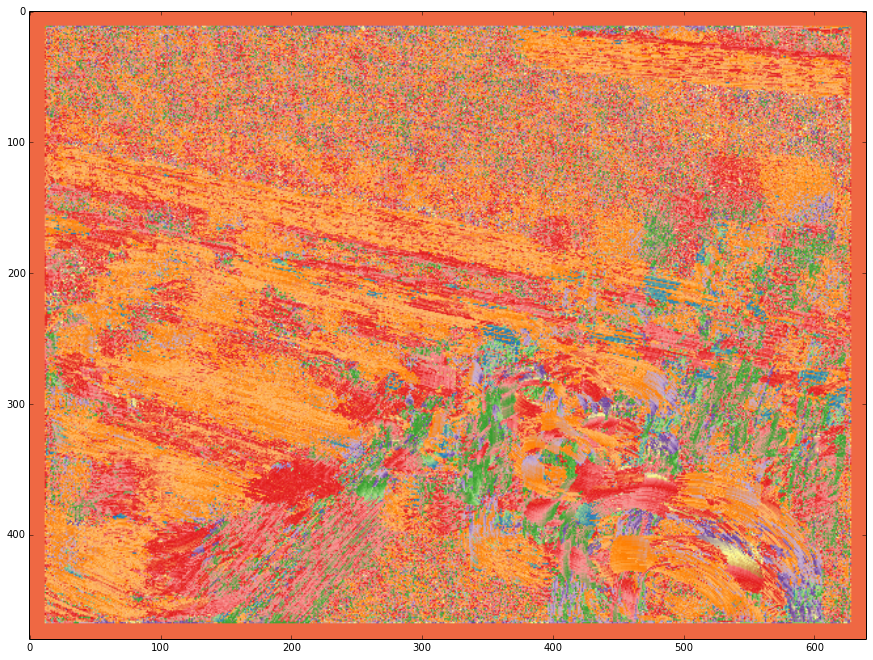

In [28]:
print gimg.shape
print gimg.dtype
print smag.shape
print smag.dtype
print np.amax(smag)

blend = cv2.addWeighted(gimg.astype(np.float32)/255.0, 0.01, smag, 0.99, 0.0)

plt.figure(figsize=(15,15))
plt.imshow(blend, cmap="afmhot")
plt.figure(figsize=(15,15))
plt.imshow(sdir, cmap="Paired")